In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import tqdm
from sklearn.decomposition import PCA
import random

### Importing Data

In [99]:
df = pd.read_csv('Mall_Customers.csv')

### Data Preprocessing

In [100]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [101]:
df.drop(['CustomerID'],axis = 1,inplace = True)

In [102]:
df = pd.get_dummies(df, columns=['Gender'],drop_first = True)

In [103]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


### Normalization

In [104]:
df['Age'] = (df['Age'] - df['Age'].mean())/(df['Age'].std())
df['Annual Income (k$)'] = (df['Annual Income (k$)'] - df['Annual Income (k$)'].mean())/(df['Annual Income (k$)'].std())
df['Spending Score (1-100)'] = (df['Spending Score (1-100)'] - df['Spending Score (1-100)'].mean())/(df['Spending Score (1-100)'].std() )
df['Gender_Male'] = (df['Gender_Male'] - df['Gender_Male'].mean())/(df['Gender_Male'].std())

In [105]:
# PCA
pca = PCA(n_components=2)
pca.fit(df)
df = pca.transform(df)

In [106]:
df

array([[-4.05365485e-01, -5.19410219e-01],
       [-1.42409922e+00, -3.66390772e-01],
       [ 5.06335102e-02, -1.88932664e+00],
       [-1.69027151e+00, -1.62782316e+00],
       [-3.12324631e-01, -1.80595084e+00],
       [-1.71314728e+00, -1.59526101e+00],
       [ 7.88841594e-01, -1.94239684e+00],
       [-2.14294405e+00, -1.50160554e+00],
       [ 2.76734182e+00, -8.80777436e-01],
       [-1.21325022e+00, -1.61235857e+00],
       [ 2.62246998e+00, -8.59081252e-01],
       [-1.68524141e+00, -1.54155943e+00],
       [ 1.68160269e+00, -2.01887859e+00],
       [-1.64195305e+00, -1.51870154e+00],
       [ 1.17149651e+00, -6.11257063e-01],
       [-1.32281122e+00, -2.36126610e-01],
       [ 1.67308406e-02, -1.73908165e+00],
       [-1.07572510e+00, -2.44103085e-01],
       [ 1.48386417e+00, -5.71242543e-01],
       [-1.65956714e+00, -1.42901176e+00],
       [ 4.86868556e-01, -3.91937611e-01],
       [-1.01639994e+00, -1.65831371e-01],
       [ 1.35551338e+00, -1.82409196e+00],
       [-7.

Early stopping occured after 15 iterations


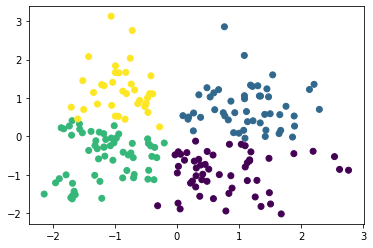

In [117]:
class kMeans():
    '''k-Means Clustering'''
    # Initialise
    def __init__(self, k=4, max_iter=100, tol=0.0001):
        self.k= k 
        self.max_iter = max_iter
        self.tol = tol
    
    # Euclidean distance (l2 norm)
    def euclidean(self, v1, v2):
        return np.sqrt(np.sum((v1-v2)**2))
    
    # Train model
    def fit(self, X_train):
        # Save train set for update stage
        self.X_train = X_train
        
        # Sample k points from X for initial centroids
        idx = np.random.randint(len(X_train), size=self.k)
        self.centroids = X_train[idx,:]
        self.clusters = np.zeros(len(X_train))
        
        # Iterate
        for i in range(self.max_iter):
            # Update clusters
            self.update_clusters()

            # Update centroids
            early_stop = self.update_centroids()
            
            # Early stopping if converged
            if early_stop==True:
                print(f'Early stopping occured after {i} iterations')
                break
    
    # Calculate which cluster each point belongs to
    def update_clusters(self):
        for row_idx, train_row in enumerate(self.X_train):
            dist = []
            for i in range(self.k):
                dist.append(self.euclidean(train_row, self.centroids[i]))
            self.clusters[row_idx] = np.argmin(np.array(dist))
        
    # Calculate center of each cluster
    def update_centroids(self):
        # Loop over k clusters
        new_centroids = np.copy(self.centroids)
        for i in range(self.k):
            new_centroids[i] = np.mean(self.X_train[self.clusters==i], axis=0)
        
        # Check for convergence
        if np.linalg.norm(new_centroids-self.centroids)>self.tol:
            self.centroids = new_centroids
            return False
        else:
            self.centroids = new_centroids
            return True
    
    # Make predictions
    def predict(self, X_test):
        predictions = np.zeros(len(X_test))
        for row_idx, test_row in enumerate(X_test):
            dist = []
            for i in range(self.k):
                dist.append(self.euclidean(test_row, self.centroids[i]))
            predictions[row_idx] = np.argmin(np.array(dist))
        return predictions

km = kMeans()
km.fit(df)
labels = km.predict(df)
plt.scatter(df[:,0],df[:,1],c = labels)